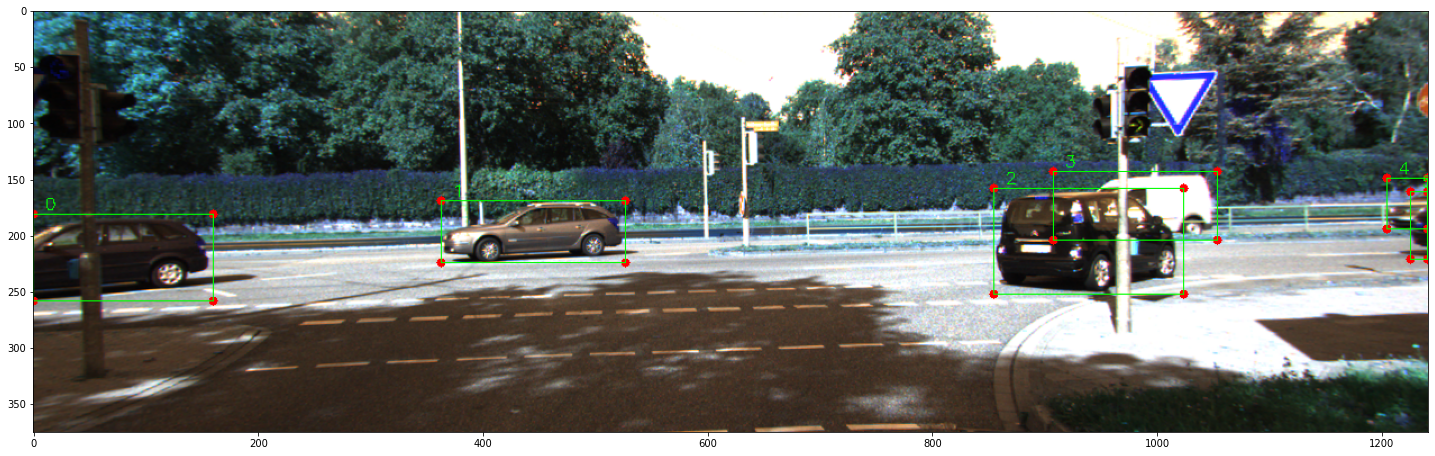

In [6]:
#  export POINT_CLOUD_DATA=/fs/ess/scratch/PLS0151/obj3d/kitti_raw/training/velodyne/ 
#  export CKPT=/fs/ess/scratch/PLS0151/obj3d/models/pv_rcnn_8369.pth
#  python demo.py --cfg_file cfgs/kitti_models/pv_rcnn.yaml --ckpt ${CKPT} --data_path ${POINT_CLOUD_DATA} 


import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL 
from PIL import Image 
plt.rcParams['figure.figsize'] = (25, 14)

import sys
sys.path.append("..") 

from app import app
from kitti.data import read_label_3d, get_image_names

image_names = get_image_names(app.DataConfig.image_dir)
for x in range(0,10):
    f = image_names[x]

    image_file = app.DataConfig.image_dir + f
    calibration_file = app.DataConfig.calibration_dir + f.replace('png', 'txt')
    label_file = app.DataConfig.label_dir + f.replace('png', 'txt')
    labels = read_label_3d(label_file)
    img = cv2.imread(image_file)

    coordinates = labels[[col for col in labels.columns if col.startswith('bbox')]].astype(int)
    corners = coordinates.apply(lambda x: ((x.bbox_xmin, x.bbox_ymin), (x.bbox_xmin, x.bbox_ymax), \
    (x.bbox_xmax, x.bbox_ymin), (x.bbox_xmax, x.bbox_ymax)), axis=1)

    for box in corners:
        for corner in box:
            cv2.circle(img, corner, 1, (255, 0, 0), 5)
            # cv.Circle(img, center, radius, color, thickness=1, lineType=8, shift=0)

    labels[['label'] + [col for col in labels.columns if col.startswith('bbox')]]
    boxes = labels.apply(lambda x: ((int(x.bbox_xmin), int(x.bbox_ymin)), (int(x.bbox_xmax), int(x.bbox_ymax))), axis=1)

    for i, box in enumerate(boxes):
        img = cv2.rectangle(img, box[0], box[1], (0, 255, 0))
        img = cv2.putText(img, str(i), (box[0][0] + 10, box[0][1] - 4) , cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

    plt.imshow(img)
    img = Image.fromarray(img, 'RGB')
    img.save(f"{x+1}.png")